In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Flatten,Reshape,Dense

C:\Users\raghu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

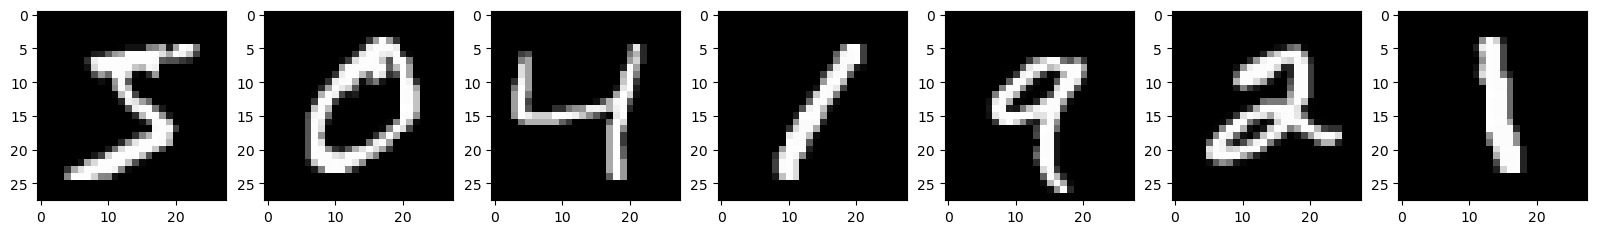

In [4]:
n=7
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[i])
    plt.gray()

In [14]:
x_train=x_train/255
x_test=x_test/255 #normalize-0 to 1

In [31]:
#flattening the image
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)


In [38]:
x_train[0].shape

(784,)

In [39]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
encoding_dim=32 #this is the bottleneck layer

In [42]:
# input layer,input place holder
input_img=Input(shape=(784,))



In [44]:
encoded=Dense(encoding_dim,activation='relu')(input_img) #encoded layer or encoder
decoded=Dense(784,activation='sigmoid')(encoded) #decoded layer or decoder

In [45]:
autoencoder=Model(input_img,decoded)

In [46]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


In [47]:
autoencoder.fit(x_train,x_train,epochs=5,batch_size=256,shuffle=True,
               validation_data=(x_test,x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3840 - val_loss: 0.1870
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1778 - val_loss: 0.1533
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1489 - val_loss: 0.1338
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1321 - val_loss: 0.1216
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1204 - val_loss: 0.1135


In [48]:
encoded_imgs=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


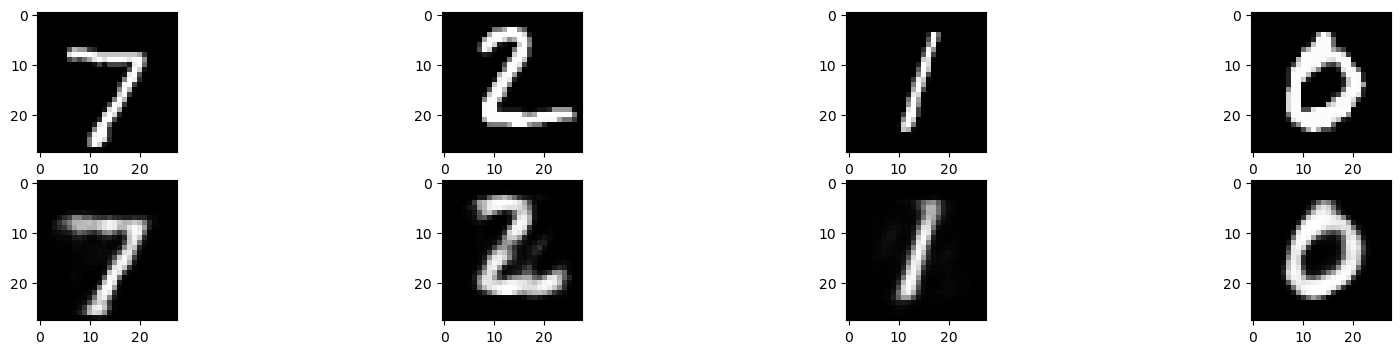

In [63]:
n=4
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()

In [67]:
x_test[0].dtype

dtype('float64')

In [68]:
encoded_imgs[0].dtype

dtype('float32')